# Lab 7: Inference and Global Climate Change 

By the end of this lab, you should know how to:

1. Test whether observed data appears to be a random sample from a distribution.
2. Analyze a natural experiment.
3. Implement and interpret a sign test.
4. Create a function to run a general hypothesis test.
5. Analyze visualizations and draw conclusions from them.

In [ ]:
name = ...

In [1]:
## import statements
# These lines load the tests. 
from gofer.ok import check

import numpy as np
from datascience import *
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
user = os.getenv('JUPYTERHUB_USER')

## Overview 

Climate change is usually referring to the general trend of warming temperatures globally.  Along with these increasing temperatures, unusual shifts in trends in weather activity such as hurricanes, storms, winds, etc are also usually classified under climate change.  While the climate can shift due to natural occurrences, scientists have found that human interventions have contributed to the trend of warming.  One explanation for the warming could be increased solar solar activity, however scientists have found that solar activity has not generally increased during the period when temperature has increased.  

<img src='solar_temp.jpg' width="500" height="340">

Links: [NASA](https://climate.nasa.gov/causes/) [Canada](https://www.canada.ca/en/environment-climate-change/services/climate-change/causes.html)

### Data 

While there's several different metrics we could analyze to make some inferences about overall trends in global climate change, for simplicity's sake we will be focusing on land temperature across different countries.  The original table came from this [database](https://github.com/OpenFloodAI/Climate-Change-Datasets), however it's been reformatted to make the downstream analyses easier.  There are 15 columns: Year, Country, Average Temperature of that country in that year 'avg', and then a column for each month of that year with temperatures.  

In [2]:
temps = Table.read_table('temp_per_country.csv')
temps

year,country,avg,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
1753,Åland,5.11833,-2.412,-3.273,0.71,2.778,6.226,11.102,15.159,15.786,12.106,8.756,2.248,-7.766
1753,Albania,12.557,1.4,2.655,8.505,11.541,16.642,22.098,23.532,21.77,18.7,13.661,7.593,2.587
1753,Andorra,11.2345,0.938,4.083,8.352,9.165,13.783,19.796,21.148,18.796,16.546,11.706,5.991,4.51
1753,Austria,6.13892,-6.398,-3.537,2.681,6.498,11.331,16.209,16.881,14.751,12.34,7.072,-0.011,-4.15
1753,Belarus,5.65175,-7.122,-6.956,0.706,6.768,13.06,16.615,18.032,16.501,12.448,6.84,0.024,-9.095
1753,Belgium,9.45708,-1.215,2.443,6.838,8.826,13.042,17.602,18.072,16.203,14.761,10.332,4.143,2.438
1753,Bosnia And Herzegovina,10.3656,-1.973,0.043,6.558,10.293,15.253,20.463,21.589,19.567,16.607,11.343,4.776,-0.132
1753,Bulgaria,10.3995,-1.841,-0.883,5.889,10.043,15.723,20.69,22.084,20.446,17.03,11.668,5.201,-1.256
1753,Croatia,11.2875,-1.311,1.012,7.5,11.318,16.33,21.666,22.721,20.52,17.527,12.113,5.342,0.712
1753,Czech Republic,7.49492,-4.72,-2.339,3.956,8.117,12.84,17.184,18.175,16.392,13.701,8.464,1.475,-3.306


### <font color=blue> **Question 1.** </font>
Let's explore this data a bit.  The cell below creates a pivot table with years as the rows and each country as a new column. We use the 'avg' column which contains the  average annual temperature.  

In [3]:
np.unique(temps['country'])

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua And Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Baker Island', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo',
       'Congo (Democratic Republic Of The)', 'Costa Rica', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', "Côte D'Ivoire",
       'Denmark', 'Denmark (Europe)', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',

In [4]:
pivotTable = temps.select('year', 'country', 'avg').pivot('country', 'year', 'avg', sum)
pivotTable

year,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Baker Island,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,"Bonaire, Saint Eustatius And Saba",Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Bulgaria,Burkina Faso,Burma,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Chad,Chile,China,Christmas Island,Colombia,Comoros,Congo,Congo (Democratic Republic Of The),Costa Rica,Croatia,Cuba,Curaçao,Cyprus,Czech Republic,Côte D'Ivoire,Denmark,Denmark (Europe),Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Europe,Falkland Islands (Islas Malvinas),Faroe Islands,Federated States Of Micronesia,Fiji,Finland,France,France (Europe),French Guiana,French Polynesia,French Southern And Antarctic Lands,Gabon,Gambia,Gaza Strip,Georgia,Germany,Ghana,Greece,Greenland,Grenada,Guadeloupe,Guam,Guatemala,Guernsey,Guinea,Guinea Bissau,Guyana,Haiti,Heard Island And Mcdonald Islands,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Isle Of Man,Israel,Italy,Jamaica,Japan,Jersey,Jordan,Kazakhstan,Kenya,Kingman Reef,Kiribati,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Macau,Macedonia,Madagascar,Malawi,Malaysia,Mali,Malta,Martinique,Mauritania,Mauritius,Mayotte,Mexico,Moldova,Monaco,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Namibia,Nepal,Netherlands,Netherlands (Europe),New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,North America,North Korea,Northern Mariana Islands,Norway,Oceania,Oman,Pakistan,Palau,Palestina,Palmyra Atoll,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Reunion,Romania,Russia,Rwanda,Saint Barthélemy,Saint Kitts And Nevis,Saint Lucia,Saint Martin,Saint Pierre And Miquelon,Saint Vincent And The Grenadines,Samoa,San Marino,Sao Tome And Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Sint Maarten,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South America,South Georgia And The South Sandwich Isla,South Korea,Spain,Sri Lanka,Sudan,Suriname,Svalbard And Jan Mayen,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor Leste,Togo,Tonga,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicas Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom (Europe),United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
1753,0,0,12.557,0,0,11.2345,0,0,0,0,0,0,0,0,6.13892,0,0,0,0,0,0,5.65175,9.45708,0,0,0,0,0,10.3656,0,0,0,10.3995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.2875,0,0,0,7.49492,0,0,7.568,0,0,0,0,0,0,0,0,4.6585,0,7.73625,0,6.49958,0,0,1.12117,12.7718,10.43,0,0,0,0,0,0,0,8.02917,0,14.7132,0,0,0,0,0,10.926,0,0,0,0,0,0,0,9.61875,1.3155,0,0,0,0,9.36908,9.30625,0,12.7374,0,0,10.926,0,0,0,0,0,0,0,0,5.13533,0,0,0,0,4.6125,5.70917,9.13775,0,10.3112,0,0,0,0,18.4743,0,0,0,0,0,8.81283,9.06558,0,10.1555,0,0,0,0,0,9.44008,9.04825,0,0,0,0,0,0,0,0,0,-0.0538333,0,0,0,0,0,0,0,0,0,0,0,7.26283,14.6823,0,0,0,8.65533,0,0,0,0,0,0,4.21583,0,0,13.8162,0,0,0,9.91017,0,0,0,0,7.39567,9.61117,0,0,0,0,0,0,13.6281,0,0,0,0,0,2.19492,6.995,0,0,0,0,0,0,0,0,0,19.9612,0,0,0,0,7.52508,0,8.42608,8.59308,0,0,0,0,0,0,0,0,0,0,5.11833
1754,0,0,12.5482,0,0,11.1162,0,0,0,0,0,0,0,0,5.90733,0,0,0,0,0,0,5.69292,9.13792,0,0,0,0,0,10.2522,0,0,0,10.4567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1303,0,0,0,7.28542,0,0,7.43308,0,0,0,0,0,0,0,0,4.65392,0,7.70733,0,6.62175,0,0,1.24392,12.6662,10.2356,0,0,0,0,0,0,0,7.75983,0,14.7948,0,0,0,0,0,10.7816,0,0,0,0,0,0,0,9.50142,1.55792,0,0,0,0,9.35642,9.209,0,12.5633,0,0,10.7816,0,0,0,0,0,0,0,0,5.12342,0,0,0,0,4.32667,5.67717,8.82758,0,10.3217,0,0,0,0,18.5128,0,0,0,0,0,8.88767,8.81275,0,10.1079,0,0,0,0,0,9.11183,8.70592,0,0,0,0,0,0,0,0,0,0.0841667,0,0,0,0,0,0,0,0,0,0,0,7.

### <font color=blue> **Select two countries of your choice to study** </font>
Select two countries from our dataset and draw a line plot of the changes in temperature over time.  You only want to graph the years that have data for both your countries of interest (Hint: Use `.select` to choose appropraite columns. You may want to utilize where and are.above() to select those years with data).  There is not a autocheck for this question as you all may have different answers depending on the countres you pick.  

In [ ]:
yourCountries = ...
yourCountries.show(5)

In [7]:
yourCountries = pivotTable.select('year','Finland','Brazil').where('year',are.above(1850))
yourCountries.show(5)

year,Finland,Brazil
1851,1.59217,24.3423
1852,0.42075,24.3599
1853,1.58358,24.3702
1854,1.63567,24.4651
1855,0.173083,24.4909


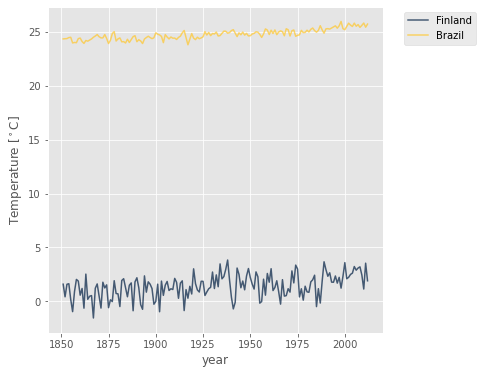

In [15]:
yourCountries.plot('year')
plt.ylabel('Temperature [$^\circ$C]')
plt.xticks(np.arange(1850, 2025, 25))
plt.show()

### <font color=blue> **Let us first study the average temperature for 35 years starting in 1850 and compare it to the 35 year average starting in 1977.** </font>
Is the average the same, higher, or lower in the recent 35 years compared to the early years in the 19th century around 1850?

In [48]:
Fin1850 = yourCountries.where('year',are.between(1850,1886))['Finland']

In [49]:
Fin1850.mean()

0.79864047619047629

In [50]:
Fin1850.std()

0.97761289340604618

In [53]:
Fin1977 = yourCountries.where('year',are.between(1977,2012))['Finland']

In [54]:
Fin1977.mean()

2.0165999999999999

In [23]:
yourCountries.where('year',are.between(1850,1885))['Brazil'].mean()

24.327250000000003

In [19]:
yourCountries.where('year',are.between(1977,2012))['Brazil'].mean()

25.363497619047617

### <font color=blue> **Are the mean temperatures from the two time periods statistically different?** </font>
We will apply standard statistical tests to see if the difference in means is statistically significant.
- Need the standard deviation of each set of temperature averages, early and recent. Concentrate on one country only at first
- We will perform a t-test to test if the two means are statistically different at the 95% confidence level.

  The <i>t</i>-test was developed by a chemist, William Gosset, working for the Guiness brewery in 1908.

  $$ t = \frac{\bar{X}-\mu}{\frac{\hat{\sigma}}{\sqrt{N}}} $$


In [59]:
from scipy import stats
N = len(Fin1850)
degfree = N-1
sample_standard_error = np.std(Fin1850, ddof=1) / np.sqrt(np.size(Fin1850))
print(f'Degrees of freedom: {degfree} mean: {Fin1850.mean():.2f} standard deviation: \
{Fin1850.std():.2f} sample_standard_error: {sample_standard_error:.2f}')
confidence_interval = stats.t.interval(0.95, degfree, Fin1850.mean(), sample_standard_error) # Probably want to explicitly build this...
print(f'Confidence Interval: {confidence_interval}')

Degrees of freedom: 34 mean: 0.80 standard deviation: 0.98 sample_standard_error: 0.17
Confidence Interval: (0.45791593057743879, 1.1393650218035138)


In [60]:
N = len(Fin1977)
degfree = N-1
sample_standard_error = np.std(Fin1977, ddof=1) / np.sqrt(np.size(Fin1977))
print(f'Degrees of freedom: {degfree} mean: {Fin1977.mean():.2f} standard deviation: \
{Fin1977.std():.2f} sample_standard_error: {sample_standard_error:.2f}')
confidence_interval = stats.t.interval(0.95, degfree, Fin1977.mean(), sample_standard_error) #
print(f'Confidence Interval: {confidence_interval}')

Degrees of freedom: 34 mean: 2.02 standard deviation: 1.01 sample_standard_error: 0.17
Confidence Interval: (1.6646821542150856, 2.3685178457849143)


### Two CI's do not overlap...
More development, questions...

### <font color=blue> **Question 1. Discussion** </font>
In this markdown cell, explain an observation you see from the figure you generated.


...

### <font color=blue> **Question 2.** </font> 
Let's visualize the change in temperature for the United States.  

In [ ]:
us = ... 

plt.figure(figsize = (10, 5))
plt.plot(us['year'].astype(int), us['United States'])
plt.xticks(np.arange(1750, 2025, 25))
plt.show()

In [ ]:
check('tests/q2.py')

### <font color=blue> **Question 3.** </font>
Null and alternative hypothesis.  We may be curious whether globally temperatures are more likely to increase or decrease on average.  Based on our preliminary figures and what we know about creating good hypotheses, set the null and alternative hypothesis below:  

- Null hypothesis:   ... 


- Alternative hypothesis: ...


To test the null hypothesis we're interested in identifying whether the temperature increased or decreased in each time period.  
Temperatures vary widely across countries and years, presumably due to the vast array of differences among the climates and human intervention. Rather than attempting to analyze the temperatures themselves, here we will restrict our analysis to whether or not temperatures increased or decreased over certain time spans. We will not concern ourselves with how much temperatures increased or decreased; only the direction of the changes - whether they increased or decreased.

The np.diff function takes an array of values and computes the differences between adjacent items of a list or array as such:

    [item 1 - item 0 , item 2 - item 1 , item 3 - item 2, ...]

Instead, we may wish to compute the difference between items that are two positions apart. For example, given a 5-element array, we may want:

    [item 2 - item 0 , item 3 - item 1 , item 4 - item 2]

The diff_n function below computes this result. Don't worry if the implementation uses unfamiliar features of Python, as long as you understand its behavior.

In [ ]:
def diff_n(values, n):
    return np.array(values)[n:] - np.array(values)[:-n]

diff_n(make_array(1, 10, 100, 1000, 10000), 2)

### <font color=blue> **Question 4.** </font> 
Implement the function changes that takes an array of temperatures for a country, ordered by increasing year. For all two-year periods (e.g., from 1960 to 1962), it computes and returns the number of increases minus the number of decreases.

For example, the array r = make_array(10, 7, 12, 9, 13, 9, 11) contains three increases (10 to 12, 7 to 9, and 12 to 13), 1 decrease (13 to 11), and one change that is neither an increase or decrease (9 to 9). Therefore, changes(r) would return 2, the difference between three increases and one decrease.

Hint: Consider using the `diff_n` function combined with boolean functions which use `np.count_non-zero` when array elements after using `diff_n` represent increases and separately when they represent decreases. Recall that Python counts `True` as 1 and `False` as 0, so counting non-zeros counts up all of the values that are `True`.

In [ ]:
def changes(array, years = 2):
    "Return the number of increases minus the number of decreases after two years."
    ...

In [ ]:
check('tests/q4.py')

### <font color=blue> **Question 5.** </font>
Assign changes_by_country to a table with one row per country that has two columns: the Country name and the Temperature changes statistic computed across all years in our data set for that country. It may be useful to split this process into two steps.   The final table's first 2 rows should look like this:

|country    |avg changes| 
|-----------|-----------| 
|Afghanistan|18         | 
|Africa     |8          

Hint: You can use a `group` method to apply your `changes` function to each column in the original data set while grouping on each country. See this example from Olympic data below:

**Note** This temperature dataset has a few peculiarities, such as including Africa in the `country` column.

In [ ]:
NORUSA = Table.read_table('NORUSA.csv')
NORUSA_NUMBERS = NORUSA.group(['Year','Team']) # Number of athletes per year
NORUSA_NUMBERS

#### Now compute the increases - decreases for the winter olympics for each team

Below code allows us to group 'Team' across all the years of the Olympics to give the following table.
|Team| Year changes | count changes|
|----|---|---|
|Norway|20|10|
|United States|20|18

Apply this concept to create the table showing net change for each country.

In [ ]:
NORUSA_NUMBERS.group('Team',changes)

In [ ]:
changes_by_country = ...
changes_by_country

In [ ]:
check('tests/q5.py')

### <font color=blue> **Question 6.** </font>
Assign test_stat to the total increases minus the total decreases for all two-year periods and all countries in our data set. For example, if the temperature in Albania went up 23 times and fell 17 times, the total change for Albania would be 6. We want the total value for all the countries together.

In [ ]:
test_stat = ...
print('Total increases minus total decreases, across all countries and years:', test_stat)

In [ ]:
check('tests/q6.py')

"More increases than decreases," one person exclaims, "Temperatures tend to go up across two-year periods. What dire times we live in."

"Not so fast," another person replies, "Even if temperatures just moved up and down uniformly at random, there would be some difference between the increases and decreases. There were a lot of countries and a lot of years, so there were many chances for changes to happen. If country temperature increase and decrease at random with equal probability, perhaps this difference was simply due to chance!"

Based on the null hypothesis above that country temperatures increase and decrease by chance, we can simulate our test statistic.  Our test statistic should depend only on whether temperature increased or decreased, not on the size of any change. Thus we choose:

    Test Statistic: The number of increases minus the number of decreases

The cell below samples increases and decreases at random from a uniform distribution 100 times. The final column of the resulting table gives the number of increases and decreases that resulted from sampling in this way. Using sample_from_distribution is faster than using sample followed by group to compute the same result.

In [ ]:
uniform = Table().with_columns(
    "Change", make_array('Increase', 'Decrease'),
    "Chance", make_array(0.5,        0.5))
uniform.sample_from_distribution('Chance', 100)

### <font color=blue> **Question 7.** </font>
Complete the simulation below, which samples num_changes increases/decreases at random many times and forms an empirical distribution of your test statistic under the null hypothesis that increases and decreases are equally probable. Your job is to:

- fill in the function simulate_under_null, which simulates a single sample under the null hypothesis, and
- fill in its argument when it's called below.

As a hint, num_changes should be approximately the number of countries times the number of time comparisons (you can find the number of year comparisons by using diff_n().  

In [ ]:
def simulate_under_null(num_chances_to_change):
    """Simulates some number changing several times, with an equal
    chance to increase or decrease.  Returns the value of your
    test statistic for these simulated changes.
    
    num_chances_to_change is the number of times the number changes.
    """
    uniform = Table().with_columns(
        "Change", make_array('Increase', 'Decrease'),
        "Chance", make_array(0.5,        0.5))
    sample = ... 
    
    ... 
    
    return ...


In [ ]:
def empirical_distribution(tbl):
    num_changes = ...
    samples = make_array()
    for i in np.arange(10000):
        samples = np.append(samples, simulate_under_null(...)) 
    Table().with_column('Test statistic under null', samples).hist(bins=np.arange(0, max(samples) + max(samples) * 0.1, 2))
    return samples

In [ ]:
samples = empirical_distribution(...) 

In [ ]:
check('tests/q7.py')

### <font color=blue> **Question 8.** </font>
Complete the analysis as follows:

1. Compute a P-value. (Hint: you can use np.count_nonzero())
2. Using a 5% P-value cutoff, draw a conclusion about the null and alternative hypotheses.
3. Describe your findings using simple, non-technical language. What does your analysis tell you about temperatures changes over time? What can you claim about causation from your statistical analysis?

**P-value:** ... 


### <font color=blue> **Question 8 Discussion:** </font>
What is your conclusion about the hypotheses?



**Findings:** ...

In [ ]:
pvalue = ...
pvalue

## Tackling Climate Change
Some countries have implemented policies and laws to counteract climate change whereas others have not - we have a table that contains a boolean to indicate whether a country has any policies or laws to protect the earth and then has a number of policies and laws implemented in that country. We can test to see if those countries that have implemented policies to counteract climate change show any difference in changes in temperatures from those countries who have not implemented policies.  A natural experiment happens when something other than experimental design applies a treatment to one group and not to another (control) group, and we have some hope that the treatment and control groups don't have any other systematic differences. This is likely not the case globally, but if we did believe that the countries didn't have other systematic differences, how would we set up the experiment.  

Data Source: [Climate Change Laws of the World](https://climate-laws.org/legislation_and_policies)

### <font color=blue> **Question 9.** </font>
Describe this investigation in terms of an experiment. What population are we studying? What is the control group? What is the treatment group? What outcome are we measuring? Be precise!

*Write your answers below.*

- Population:  ...

- Control:  ...

- Treatment:  ...

- Outcome:  ...



In [ ]:
laws = Table.read_table('laws.csv')
laws

### <font color=blue> **Question 10.** </font>
Let's set up to compute an empirical distribution for countries that have laws and policies that attempt to counteract climate change and an empirical distribution for countries that have not implemented laws and policies.  We want to focus on the time range between 1990 and 2020 as the majority of laws were implemented in this time period. We're going to split this up into four steps.  
1. Combine the temperature table and the laws table.  
2. Set year_range to the correct time period.  
3. Create two tables: one of countries that have climate change laws and one for countries that do not.  

In [ ]:
temp_law = ...
year_range = ...
haveLaws = ...
noLaws = ...

In [ ]:
check('tests/q10.py')

### <font color=blue> **Question 11.** </font>
Calculate the test statistic for both subsets of countries: those that have implemented climate change laws and those that have not implemented these laws.

In [ ]:
laws_test_stat = ...
laws_test_stat

In [ ]:
nolaws_test_stat = ...
nolaws_test_stat

In [ ]:
check('tests/q11.py')

### <font color=blue> **Question 12.** </font>
Now using these tables from question 10 and the calculated test statistic from question 11, create an empirical distribution and calculate a p-value.  

In [ ]:
haveLawsSamples = ...
lawsPvalue = ...
print("P-value for countries that have implemented policies to counteract climate change from 1990 to 2020 :" + str(lawsPvalue))

In [ ]:
noLawsSamples = ...
nolawsPvalue = ...
print("P-value for countries that have NOT implemented policies to counteract climate change from 1990 to 2020 :" + str(nolawsPvalue))

### <font color=blue> **Question 13.** </font>
Explain what our results show in the markdown cell below. In particular, discuss whether or not you would expect climate control measures taken by any one country to specifically benefit that country. 

...

### <font color=blue> **Question 14.** </font>
At the end of each lab, please include a reflection. 
* How did this lab go? 
* Did you find the seconds_since_2000 question tricky? Did you break the calculation into steps?
* Were there questions you found especially challenging you would like your instructor to review in class? 
* How long did the lab take you to complete?

Share your feedback so we can continue to improve this class!

**Insert a markdown cell below this one and write your reflection on this lab.**

...

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import glob
from gofer.ok import check
correct = 0
checks = [2, 4, 5, 6, 7, 10, 11]
total = len(checks)
for x in checks:
    print('Testing question {}: '.format(str(x)))
    g = check('tests/q{}.py'.format(str(x)))
    if g.grade == 1.0:
        print("Passed")
        correct += 1
    else:
        print('Failed')
        display(g)

print('Grade:  {}'.format(str(correct/total)))

In [ ]:
print("Nice work ",name, user)
import time;
localtime = time.asctime( time.localtime(time.time()) )
print("Submitted @ ", localtime)